In [8]:
import json
import ast

import numpy as np
import importlib
from tqdm import tqdm

In [11]:
str_buffer = ""
open_brackets = 0
def dfs(json_line, node_ind):
    global str_buffer, open_brackets
    node = json_line[node_ind]
    if len(str_buffer) > 0 and str_buffer[-1] != ' ':
        str_buffer += ' '
    open_brackets += 1
    if 'value' in node:
        str_buffer += f"(<{node['type']}> {node['value']}"
    else:
        str_buffer += f"(<{node['type']}> <EMPTY>"
    if 'children' in node.keys():
        for child in node['children']:
            dfs(json_line, child)
    open_brackets -= 1
    str_buffer += ')'
    if open_brackets < 0:
        print("ALARM")
        raise Exception

In [12]:
ast_path = 'neural_code_sum_data/seq_reposplit/python/ast_train.txt'
ast_train = open(ast_path, 'r')
ast_train_list = [line.rstrip('\n') for line in ast_train]
print("train size:", len(ast_train_list))

!rm neural_code_sum_data/seq_reposplit/python/brackets_traverse_train.txt

is_first = True
with open('neural_code_sum_data/seq_reposplit/python/brackets_traverse_train.txt', 'a') as f:
    with tqdm(total=len(ast_train_list)) as progress_bar:
        for line in ast_train_list:
            json_line = json.loads(line)
            str_buffer = ""
            open_brackets = 0
            dfs(json_line, 0)
            if open_brackets != 0:
                print("open_brackets =", open_brackets, "!")
                raise Exception
            if len(str_buffer) < 5:
                print("len(str_buffer) =", len(str_buffer))
                raise Exception
            elif len(str_buffer) > 1e4:
                print("len(str_buffer) =", len(str_buffer))
                raise Exception
            if is_first:
                f.write(str_buffer)
                is_first = False
            else:
                f.write('\n' + str_buffer)
            progress_bar.update(1)
ast_train.close()

train size: 74477


100%|██████████| 74477/74477 [00:11<00:00, 6247.98it/s]


In [13]:
ast_path = 'neural_code_sum_data/seq_reposplit/python/ast_test.txt'
ast_test = open(ast_path, 'r')
ast_test_list = [line.rstrip('\n') for line in ast_test]
print("test size:", len(ast_test_list))

!rm neural_code_sum_data/seq_reposplit/python/brackets_traverse_test.txt

is_first = True
with open('neural_code_sum_data/seq_reposplit/python/brackets_traverse_test.txt', 'a') as f:
    with tqdm(total=len(ast_test_list)) as progress_bar:
        for line in ast_test_list:
            json_line = json.loads(line)
            str_buffer = ""
            open_brackets = 0
            dfs(json_line, 0)
            if open_brackets != 0:
                print("open_brackets =", open_brackets, "!")
                raise Exception
            if len(str_buffer) < 5:
                print("len(str_buffer) =", len(str_buffer))
                raise Exception
            elif len(str_buffer) > 1e4:
                print("len(str_buffer) =", len(str_buffer))
                raise Exception
            if is_first:
                f.write(str_buffer)
                is_first = False
            else:
                f.write('\n' + str_buffer)
            progress_bar.update(1)
ast_test.close()

test size: 26433


100%|██████████| 26433/26433 [00:04<00:00, 5818.95it/s]


In [14]:
ast_path = 'neural_code_sum_data/seq_reposplit/python/ast_valid.txt'
ast_valid = open(ast_path, 'r')
ast_valid_list = [line.rstrip('\n') for line in ast_valid]
print("valid size:", len(ast_valid_list))

!rm neural_code_sum_data/seq_reposplit/python/brackets_traverse_valid.txt

is_first = True
with open('neural_code_sum_data/seq_reposplit/python/brackets_traverse_valid.txt', 'a') as f:
    with tqdm(total=len(ast_valid_list)) as progress_bar:
        for line in ast_valid_list:
            json_line = json.loads(line)
            str_buffer = ""
            open_brackets = 0
            dfs(json_line, 0)
            if open_brackets != 0:
                print("open_brackets =", open_brackets, "!")
                raise Exception
            if len(str_buffer) < 5:
                print("len(str_buffer) =", len(str_buffer))
                raise Exception
            elif len(str_buffer) > 1e4:
                print("len(str_buffer) =", len(str_buffer))
                raise Exception
            if is_first:
                f.write(str_buffer)
                is_first = False
            else:
                f.write('\n' + str_buffer)
            progress_bar.update(1)
ast_valid.close()

valid size: 23171


100%|██████████| 23171/23171 [00:03<00:00, 5948.01it/s]


### Распределения длин после добавления скобочной последовательности:

In [15]:
brackets_path = 'neural_code_sum_data/seq_reposplit/python/brackets_traverse_train.txt'
traverse_path = 'neural_code_sum_data/seq_reposplit/python/traverse_train.txt'
brackets_train = open(brackets_path, 'r')
traverse_train = open(traverse_path, 'r')
brackets_train_list = [line.rstrip('\n') for line in brackets_train]
traverse_train_list = [line.rstrip('\n') for line in traverse_train]

/home/marat/anaconda3/envs/tt/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/marat/anaconda3/envs/tt/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


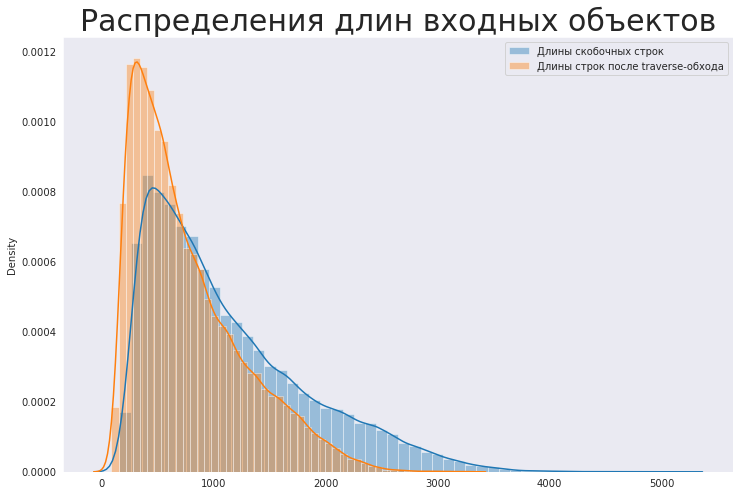

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("dark")

brackets_lens = list(map(len, brackets_train_list))
traverse_lens = list(map(len, traverse_train_list))

plt.figure(figsize=(12, 8))
sns.distplot(brackets_lens, label='Длины скобочных строк')
sns.distplot(traverse_lens, label='Длины строк после traverse-обхода')
plt.title('Распределения длин входных объектов', fontsize=30)
plt.legend()
plt.show()

In [17]:
print(brackets_train_list[0])

(<Module> <EMPTY> (<FunctionDef> client_start (<arguments> <EMPTY> (<args> <EMPTY> (<arg> <EMPTY> (<identifier> request)) (<arg> <EMPTY> (<identifier> socket)) (<arg> <EMPTY> (<identifier> context))) (<defaults> <EMPTY>)) (<body> <EMPTY> (<Assign> <EMPTY> (<SubscriptStore> <EMPTY> (<NameLoad> CLIENTS) (<Index> <EMPTY> (<AttributeLoad> <EMPTY> (<AttributeLoad> <EMPTY> (<NameLoad> socket) (<attr> session)) (<attr> session_id)))) (<TupleLoad> <EMPTY> (<NameLoad> request) (<NameLoad> socket) (<NameLoad> context)))) (<decorator_list> <EMPTY>)))
